## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how ="left")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_count = combined_data_df["Mouse ID"].nunique()
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = combined_data_df[combined_data_df["Mouse ID"].duplicated()]
mice_duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
one_mouse_display = mice_duplicates.sort_values(by = "Mouse ID", ascending = True)
one_mouse_display.head(9)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1295,a203,25,56.793208,1,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
1804,a203,45,67.973419,2,Infubinol,Female,20,23
758,a203,15,52.777870,1,Infubinol,Female,20,23
1315,a203,30,59.523197,1,Infubinol,Female,20,23
598,a203,10,51.852437,1,Infubinol,Female,20,23
1018,a203,20,55.173336,1,Infubinol,Female,20,23
1675,a203,40,63.593490,2,Infubinol,Female,20,23
1577,a203,35,61.931650,2,Infubinol,Female,20,23


In [6]:
#Getting the mice ID's to put into a DF
mice = combined_data_df["Mouse ID"].unique()
mice

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_id_list = pd.Series(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
       'c895', 'a203', 'f394', 'c264', 'n967', 'f545', 'k894', 'k754',
       'g296', 'd164', 'w575', 'x613', 'q633', 'b313', 'f129', 'j365',
       'p136', 'c559', 'a788', 's337', 'q511', 'm331', 'o926', 'd133',
       'n630', 'a401', 'w350', 'c302', 'a897', 'j235', 'q787', 'a262',
       'r850', 'i669', 'n763', 's152', 'c766', 'e227', 'c282', 'v989',
       'w140', 'v409', 'l872', 'o795', 'y478', 'q582', 's166', 'x773',
       'w167', 't718', 'o302', 'i477', 'c757', 't994', 'p310', 'a699',
       'k603', 'x822', 'l558', 'l733', 'f436', 'l490', 'b759', 'l471',
       'y865', 'y769', 'l661', 'j296', 'u149', 'u153', 'w151', 'h531',
       'a685', 'o813', 'm756', 'n671', 's121', 'v766', 'w193', 'e476',
       'w584', 'b447', 'k210', 'a275', 'x581', 'n482', 't198', 'l215',
       's141', 'o523', 'i635', 'w746', 'r107', 's187', 'g570', 'x209',
       'x111', 'z435', 'n678', 'g558', 'u946', 'o562', 'v991', 'c927',
       'x226', 'p438', 'b487', 'o287', 'q483', 't573', 'f345', 'i334',
       'l264', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'])
dropped_duplicates_df = mice_duplicates[mice_duplicates["Mouse ID"].isin(mice_id_list)]
dropped_duplicates_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
second_mice_count = dropped_duplicates_df["Mouse ID"].nunique()
second_mice_count

237

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


tumor_volume_median = dropped_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_mean = dropped_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_var = dropped_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_stddev = dropped_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

#Dataframe of the statistics
tumor_data_df = {"Mean" : tumor_volume_mean,
              "Median" : tumor_volume_median,
              "Variance" : tumor_volume_var,
              "Std. Dev" : tumor_volume_stddev,
#               "Tumor Volume Std. Err" : tumor_volume_stderr
             }
tumor_data_df
# tumor_volume_mean
# tumor_volume_median
# tumor_volume_var
# tumor_volume_stddev

{'Mean': Drug Regimen
 Capomulin    40.148392
 Ceftamin     53.831559
 Infubinol    54.173160
 Ketapril     56.805521
 Naftisol     55.780565
 Placebo      55.481270
 Propriva     53.668609
 Ramicane     39.627674
 Stelasyn     55.644586
 Zoniferol    54.548052
 Name: Tumor Volume (mm3), dtype: float64,
 'Median': Drug Regimen
 Capomulin    40.716428
 Ceftamin     52.847559
 Infubinol    53.244458
 Ketapril     56.098998
 Naftisol     54.234502
 Placebo      53.354528
 Propriva     52.663801
 Ramicane     39.769552
 Stelasyn     54.328317
 Zoniferol    53.287287
 Name: Tumor Volume (mm3), dtype: float64,
 'Variance': Drug Regimen
 Capomulin    25.434058
 Ceftamin     34.725752
 Infubinol    38.326085
 Ketapril     60.485143
 Naftisol     60.794406
 Placebo      55.762387
 Propriva     38.438982
 Ramicane     23.213127
 Stelasyn     53.476333
 Zoniferol    43.708157
 Name: Tumor Volume (mm3), dtype: float64,
 'Std. Dev': Drug Regimen
 Capomulin    5.043219
 Ceftamin     5.892856
 Infubi

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# tumor_data_df.agg({"Mean" : "tumor_volume_mean",
#               "Median" : "tumor_volume_median",
#               "Variance" : "tumor_volume_var",
#               "Std. Dev" : "tumor_volume_stddev",})



## Bar and Pie Charts

In [181]:
#Create the data to extract info from
mice_and_drug = dropped_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
mice_and_drug


Drug Regimen
Capomulin    205
Ceftamin     153
Infubinol    153
Ketapril     163
Naftisol     161
Placebo      156
Propriva     136
Ramicane     203
Stelasyn     157
Zoniferol    157
Name: Tumor Volume (mm3), dtype: int64

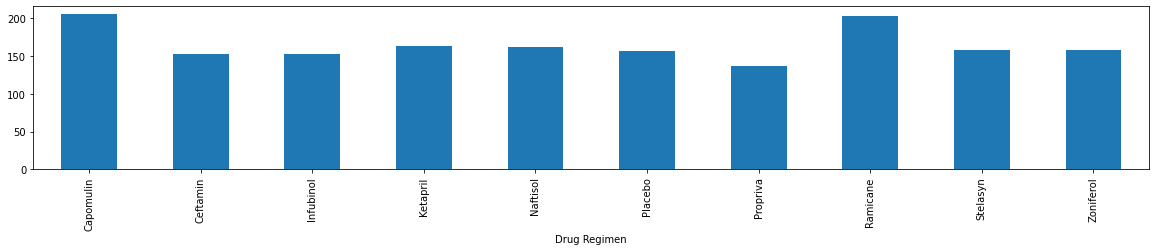

<Figure size 432x288 with 0 Axes>

In [182]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas
mice_and_drug.plot(kind="bar", figsize=(20,3))
plt.show()
plt.tight_layout()

In [184]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# drug_list = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
y_axis = np.arange(0,300,50)
x_axis = np.arange(mice_and_drug)
plt.bar("Drug Regimen", x_axis, color="b", alpha=0.5)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_and_drug.plot(kind="pie", figsize=(20,3))
plt.show()
plt.tight_layout()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
